In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [54]:
bdd = pd.read_csv("/neurospin/dico/agaudin/Runs/05_rigourous/Output/bdd_05.csv", index_col=0)
bdd = bdd.sort_values(by=['dataset_name', 'max_epochs'], ascending=True)
bdd

,model_path,auc,auc_std,accuracy,accuracy_std,backbone_name,dataset_name,foldlabel,max_angle,max_epochs,num_representation_features,train_val_csv_file,git_branch
3,/neurospin/dico/agaudin/Runs/05_rigourous/Outp...,0.765178,0.002214,0.714760,0.009040,convnet,cingulate_HCP_half_1,True,6,5,10,/neurospin/dico/data/deep_folding/papers/midl2...,Run_03_aymeric
4,/neurospin/dico/agaudin/Runs/05_rigourous/Outp...,0.724701,0.003540,0.669287,0.006510,convnet,cingulate_HCP_half_1,True,6,5,10,/neurospin/dico/data/deep_folding/papers/midl2...,Run_03_aymeric
68,/neurospin/dico/agaudin/Runs/05_rigourous/Outp...,0.735087,0.004577,0.685918,0.010806,convnet,cingulate_HCP_half_1,True,6,5,10,/neurospin/dico/data/deep_folding/papers/ipmi2...,Run_03_aymeric
79,/neurospin/dico/agaudin/Runs/05_rigourous/Outp...,0.734549,0.003508,0.716257,0.005491,convnet,cingulate_HCP_half_1,False,6,5,10,/neurospin/dico/data/deep_folding/papers/ipmi2...,Run_03_aymeric
80,/neurospin/dico/agaudin/Runs/05_rigourous/Outp...,0.712555,0.003185,0.686456,0.012417,convnet,cingulate_HCP_half_1,False,6,5,10,/neurospin/dico/data/deep_folding/papers/ipmi2...,Run_03_aymeric
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,/neurospin/dico/agaudin/Runs/05_rigourous/Outp...,0.720853,0.004433,0.733076,0.006793,convnet,cingulate_UkBioBank_most_folded_551,True,6,251,10,/neurospin/dico/agaudin/Runs/05_rigourous/2022...,Run_03_aymeric
60,/neurospin/dico/agaudin/Runs/05_rigourous/Outp...,0.747058,0.003806,0.701053,0.008453,convnet,cingulate_UkBioBank_most_folded_551,True,6,251,10,/neurospin/dico/agaudin/Runs/05_rigourous/2022...,Run_03_aymeric
101,/neurospin/dico/agaudin/Runs/05_rigourous/Outp...,0.744843,0.004496,0.701661,0.007056,convnet,cingulate_UkBioBank_most_folded_551,True,6,251,10,/neurospin/dico/agaudin/Runs/05_rigourous/2022...,Run_03_aymeric
102,/neurospin/dico/agaudin/Runs/05_rigourous/Outp...,0.716084,0.003883,0.732234,0.009714,convnet,cingulate_UkBioBank_most_folded_551,True,6,251,10,/neurospin/dico/agaudin/Runs/05_rigourous/2022...,Run_03_aymeric


In [55]:
bdd[bdd.foldlabel == False]

,model_path,auc,auc_std,accuracy,accuracy_std,backbone_name,dataset_name,foldlabel,max_angle,max_epochs,num_representation_features,train_val_csv_file,git_branch
79,/neurospin/dico/agaudin/Runs/05_rigourous/Outp...,0.734549,0.003508,0.716257,0.005491,convnet,cingulate_HCP_half_1,False,6,5,10,/neurospin/dico/data/deep_folding/papers/ipmi2...,Run_03_aymeric
80,/neurospin/dico/agaudin/Runs/05_rigourous/Outp...,0.712555,0.003185,0.686456,0.012417,convnet,cingulate_HCP_half_1,False,6,5,10,/neurospin/dico/data/deep_folding/papers/ipmi2...,Run_03_aymeric
81,/neurospin/dico/agaudin/Runs/05_rigourous/Outp...,0.687001,0.003267,0.666292,0.006949,convnet,cingulate_HCP_half_1,False,6,5,10,/neurospin/dico/data/deep_folding/papers/ipmi2...,Run_03_aymeric
82,/neurospin/dico/agaudin/Runs/05_rigourous/Outp...,0.716335,0.002193,0.702760,0.008781,convnet,cingulate_HCP_half_1,False,6,5,10,/neurospin/dico/data/deep_folding/papers/ipmi2...,Run_03_aymeric
0,/neurospin/dico/agaudin/Runs/05_rigourous/Outp...,0.554332,0.020763,0.607836,0.019011,pointnet,cingulate_HCP_half_1,False,10,251,30,NaN,pointnet
78,/neurospin/dico/agaudin/Runs/05_rigourous/Outp...,0.651144,0.003759,0.661053,0.015104,convnet,cingulate_UkBioBank_most_folded_551,False,6,5,10,/neurospin/dico/agaudin/Runs/05_rigourous/2022...,Run_03_aymeric


In [60]:
def confidence_interval(data, percentage=95):
    if percentage == 95:
        z = 1.96
    else:
        raise(ValueError("frero..."))
    
    std = np.std(data)
    N = data.shape[0]

    diff = z * std/np.sqrt(N)

    return diff

In [83]:
def plot_func_of_epochs(df):
    means = df.groupby('max_epochs').mean().auc
    n = means.shape[0]

    counts = df.groupby('max_epochs').count().auc
    print(counts)

    yerrs = []
    for n_epochs in df.max_epochs.unique():
        filtered_df = df[df.max_epochs == n_epochs]
        yerrs.append(confidence_interval(filtered_df.auc))

    fig, ax = plt.subplots()

    plt.grid(axis='y')
    ax.set_axisbelow(True)
    plt.bar(range(n), means)
    plt.xticks(range(n), df.max_epochs.unique())
    plt.errorbar(range(n), means, yerr=yerrs, xerr=None, ecolor='black', fmt='None')
    plt.plot()

    return means

max_epochs
1       7
5      22
25      7
125     5
251     5
Name: auc, dtype: int64


max_epochs
1      0.643889
5      0.711136
25     0.679192
125    0.670194
251    0.677408
Name: auc, dtype: float64

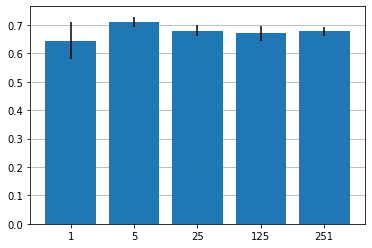

In [84]:
# least folded brains
least_folded = bdd[bdd.dataset_name == 'cingulate_UkBioBank_least_folded_551']

plot_func_of_epochs(least_folded)

max_epochs
1      11
5      11
25      7
125     5
251     5
Name: auc, dtype: int64


max_epochs
1      0.618493
5      0.739359
25     0.730130
125    0.743861
251    0.723462
Name: auc, dtype: float64

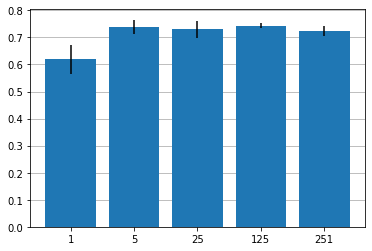

In [85]:
# most folded brains
most_folded = bdd[bdd.dataset_name == 'cingulate_UkBioBank_most_folded_551']

plot_func_of_epochs(most_folded)

max_epochs
1      5
5      7
25     5
125    5
251    5
Name: auc, dtype: int64


max_epochs
1      0.601672
5      0.722982
25     0.686726
125    0.714806
251    0.739702
Name: auc, dtype: float64

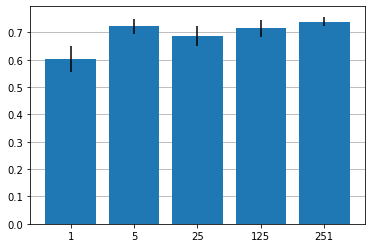

In [86]:
# mid folded brains
mid_folded = bdd[bdd.dataset_name == 'cingulate_UkBioBank_mid_folded_551']

plot_func_of_epochs(mid_folded)

# Analysis

In [59]:
from scipy.stats import ttest_ind

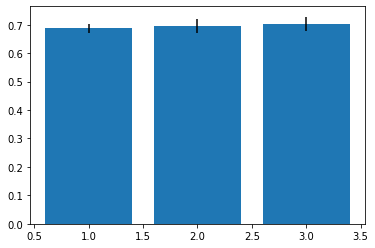

Least and mid Ttest_indResult(statistic=-0.5142870365099735, pvalue=0.609409200949996)
Least and most Ttest_indResult(statistic=-1.0334243827865044, pvalue=0.30533414434449657)
Mid and most Ttest_indResult(statistic=0.45993442493483194, pvalue=0.647170700602233)


In [61]:
datasets = [least_folded, mid_folded, most_folded]

def plot_bars_with_errors(datasets, title=None):
    means = [datasets[i].auc.mean() for i in range(len(datasets))]
    X = range(1,4)

    plt.bar(X, means)

    errorbars = []

    for dataset in datasets:
        data = dataset.auc
        diff = confidence_interval(data)
        errorbars.append(diff)

    plt.errorbar(X, means, yerr=errorbars, xerr=None, ecolor='black', fmt='None')

    plt.title(title)
    plt.show()


plot_bars_with_errors(datasets)

print('Least and mid', ttest_ind(least_folded.auc, mid_folded.auc, equal_var=False))
print('Least and most', ttest_ind(least_folded.auc, most_folded.auc, equal_var=False))
print('Mid and most', ttest_ind(most_folded.auc, mid_folded.auc, equal_var=False))

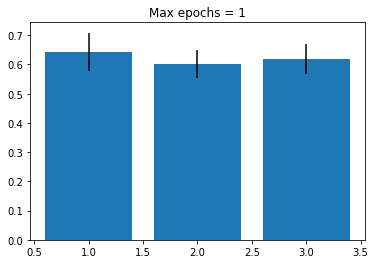

Least and mid Ttest_indResult(statistic=0.9452763816251348, pvalue=0.36693850314770804)
Least and most Ttest_indResult(statistic=0.5589464462368582, pvalue=0.5858576382900519)
Mid and most Ttest_indResult(statistic=0.43316764139327457, pvalue=0.6726569936847302)


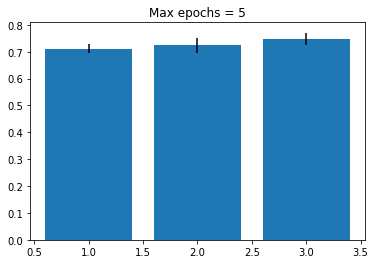

Least and mid Ttest_indResult(statistic=-0.6684617574217396, pvalue=0.5179624120563474)
Least and most Ttest_indResult(statistic=-2.454242862923827, pvalue=0.023607171835703884)
Mid and most Ttest_indResult(statistic=1.3013728967517542, pvalue=0.21646318120450947)


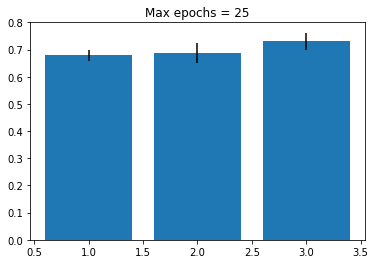

Least and mid Ttest_indResult(statistic=-0.31161785597706887, pvalue=0.7658126201267644)
Least and most Ttest_indResult(statistic=-2.469791624882359, pvalue=0.033030243225199284)
Mid and most Ttest_indResult(statistic=1.5615926625099095, pvalue=0.1546513843363734)


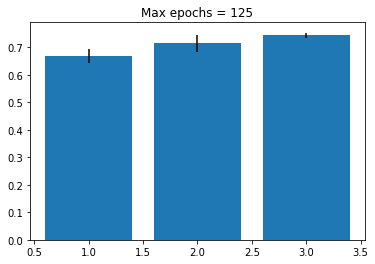

Least and mid Ttest_indResult(statistic=-1.9141338887371169, pvalue=0.0935240276136069)
Least and most Ttest_indResult(statistic=-4.70480358147686, pvalue=0.005062893758803562)
Mid and most Ttest_indResult(statistic=1.5354012555644083, pvalue=0.18860451781605211)


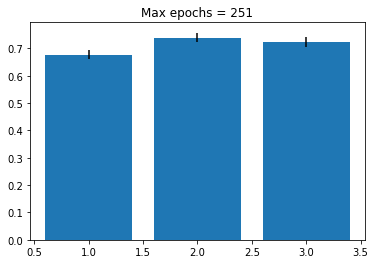

Least and mid Ttest_indResult(statistic=-4.720338145523628, pvalue=0.0016013936966763002)
Least and most Ttest_indResult(statistic=-3.3536939839749467, pvalue=0.010733294682982722)
Mid and most Ttest_indResult(statistic=-1.106196116856871, pvalue=0.3009325811616268)


In [62]:
n_epochs = [1,5,25,125,251]

for n in n_epochs:
    dbs = []
    for db in [least_folded, mid_folded, most_folded]:
        db = db[db.max_epochs == n]
        dbs.append(db)
        
    plot_bars_with_errors(dbs, title=f'Max epochs = {n}')
    print('Least and mid', ttest_ind(dbs[0].auc, dbs[1].auc, equal_var=False))
    print('Least and most', ttest_ind(dbs[0].auc, dbs[2].auc, equal_var=False))
    print('Mid and most', ttest_ind(dbs[2].auc, dbs[1].auc, equal_var=False))

In [ ]:
dbs = [least_folded, mid_folded, most_folded]

for db in dbs:
    print(
